C:\Users\Shashank\AppData\Local\Temp\ipykernel_91704\3308717018.py:24: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  spline = UnivariateSpline(x[mask], y[mask], s=0.5)
C:\Users\Shashank\AppData\Local\Temp\ipykernel_91704\3308717018.py:24: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  spline = UnivariateSpline(x[mask], y[mask], s=0.5)
C:\Users\Shashank\AppData\Local\Temp\ipykernel_91704\3308717018.py:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be mad

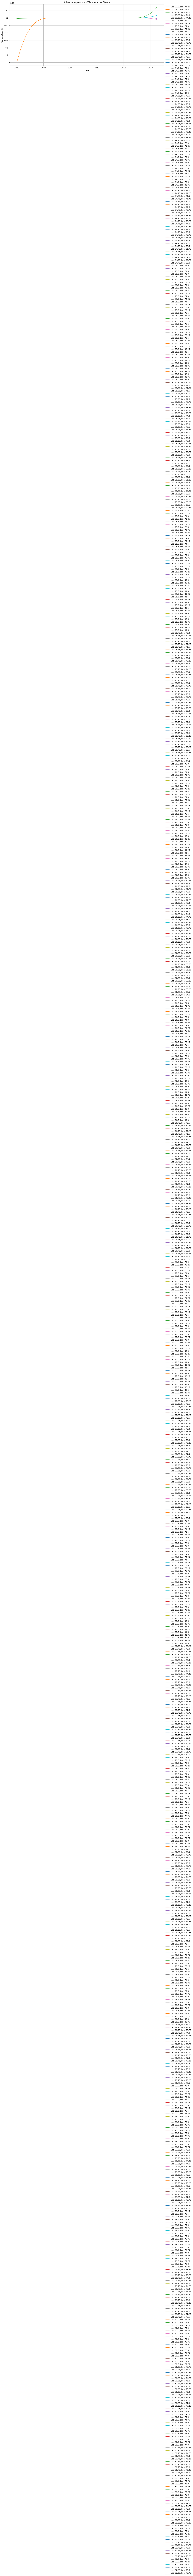

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
import numpy as np

# Load CSV and treat "nan" strings as NaNs
df = pd.read_csv("Insitu_nan_row_removed.csv", na_values="Nan")
df.set_index(['Lat', 'Lon'], inplace=True)

# Transpose so dates are rows and (Lat, Lon) are columns
df_t = df.transpose()
df_t.index = pd.to_datetime(df_t.index)

# Prepare x-axis as float values for spline (e.g., number of days)
x = (df_t.index - df_t.index[0]).days.values

plt.figure(figsize=(15, 6))

# Plot spline interpolations
for loc in df_t.columns:
    y = df_t[loc].astype(float).values  # Use df_t, not df
    if np.count_nonzero(~np.isnan(y)) >= 4:
        mask = ~np.isnan(y)
        spline = UnivariateSpline(x[mask], y[mask], s=0.5)
        y_smooth = spline(x)
        plt.plot(df_t.index, y_smooth, label=f'Lat: {loc[0]}, Lon: {loc[1]}')

plt.title("Spline Interpolation of Temperature Trends")
plt.xlabel("Date")
plt.ylabel("Temperature (K)")
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()


C:\Users\Shashank\AppData\Local\Temp\ipykernel_85080\2759629742.py:46: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


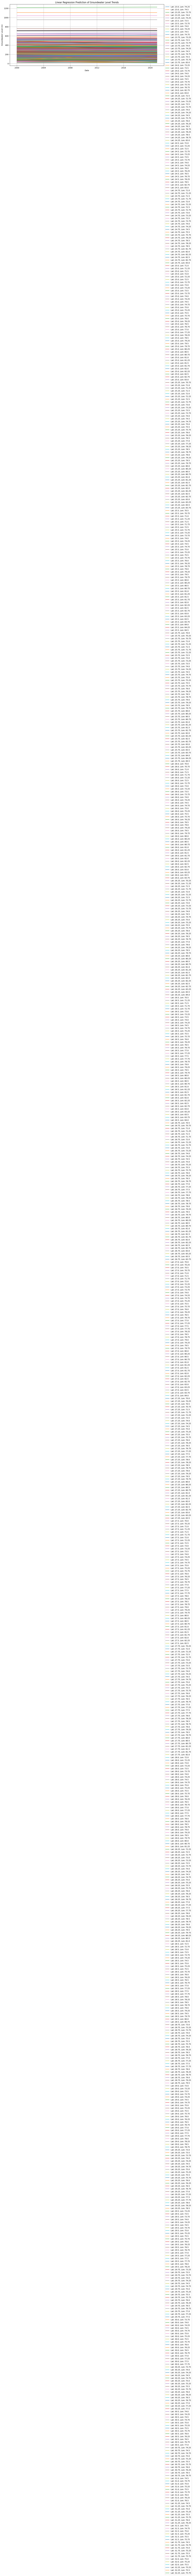

(23.0, 74.25): R2 = 0.031, MSE = 2.847
(23.0, 74.5): R2 = 0.192, MSE = 3.815
(23.25, 73.75): R2 = 0.041, MSE = 4.899
(23.25, 74.0): R2 = 0.000, MSE = 5.337
(23.25, 74.25): R2 = 0.023, MSE = 0.954
(23.5, 73.5): R2 = 0.017, MSE = 7.970
(23.5, 73.75): R2 = 0.016, MSE = 13.394
(23.5, 74.0): R2 = 0.001, MSE = 8.337
(23.5, 74.25): R2 = 0.045, MSE = 4.196
(23.5, 74.5): R2 = 0.009, MSE = 7.564
(23.5, 74.75): R2 = 0.004, MSE = 6.215
(23.75, 73.25): R2 = 0.023, MSE = 8.106
(23.75, 73.5): R2 = 0.050, MSE = 10.263
(23.75, 73.75): R2 = 0.077, MSE = 6.010
(23.75, 74.0): R2 = 0.068, MSE = 11.458
(23.75, 74.25): R2 = 0.042, MSE = 4.038
(23.75, 74.5): R2 = 0.001, MSE = 16.030
(23.75, 74.75): R2 = 0.039, MSE = 12.631
(23.75, 75.5): R2 = 0.072, MSE = 5.196
(23.75, 75.75): R2 = 0.074, MSE = 30.102
(23.75, 83.0): R2 = 0.056, MSE = 4.174
(24.0, 73.25): R2 = 0.084, MSE = 7.748
(24.0, 73.5): R2 = 0.028, MSE = 2.964
(24.0, 73.75): R2 = 0.219, MSE = 12.531
(24.0, 74.0): R2 = 0.033, MSE = 1.430
(24.0, 74.25): R2

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load and preprocess the data
df = pd.read_csv("Insitu_nan_row_removed.csv")
df.set_index(['Lat', 'Lon'], inplace=True)

df_t = df.transpose()
df_t.index = pd.to_datetime(df_t.index)
x = (df_t.index - df_t.index[0]).days.values.reshape(-1, 1)  # shape: (253, 1)

# For storing models and scores
model_scores = {}

plt.figure(figsize=(15, 6))

for loc in df_t.columns:  # now this loops over (Lat, Lon)
    y_raw = df_t[loc].replace("Nan", np.nan).astype(float).values  # shape: (253,)
    mask = ~np.isnan(y_raw)
    
    if np.count_nonzero(mask) >= 4:
        x_train = x[mask]
        y_train = y_raw[mask]

        model = LinearRegression()
        model.fit(x_train, y_train)

        y_pred = model.predict(x)

        plt.plot(df_t.index, y_pred, label=f'Lat: {loc[0]}, Lon: {loc[1]}')

        # Store score
        model_scores[loc] = {
            'R2': r2_score(y_train, model.predict(x_train)),
            'MSE': mean_squared_error(y_train, model.predict(x_train))
        }

plt.title("Linear Regression Prediction of Groundwater Level Trends")
plt.xlabel("Date")
plt.ylabel("Groundwater Level (m)")
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# Optionally print model performance
for loc, score in model_scores.items():
    print(f"{loc}: R2 = {score['R2']:.3f}, MSE = {score['MSE']:.3f}")
